<a href="https://colab.research.google.com/github/sruthib22/data690fall21/blob/main/data_scientist%2C_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [108]:
df1 = pd.read_csv('/content/train.csv')
df1.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [109]:
df1 = df1[(df1['Inflight wifi service']!=0)&(df1['Departure/Arrival time convenient']!=0)&(df1['Ease of Online booking']!=0)&(df1['Gate location'])&(df1['Food and drink']!=0)&(df1['Online boarding']!=0)&(df1['Seat comfort']!=0)&(df1['Inflight entertainment']!=0)&(df1['On-board service']!=0)&(df1['Leg room service']!=0)&(df1['Baggage handling']!=0)&(df1['Checkin service']!=0)&(df1['Inflight service']!=0)&(df1['Cleanliness']!=0)]


In [110]:
df1['satisfaction'] = df1['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df1 = df1.reset_index()
df1 = df1.drop('index',axis=1)
df1['Total Delay'] = df1['Departure Delay in Minutes'] + df1['Arrival Delay in Minutes']


In [111]:
DF = df1.copy()
df1 = df1.drop('id',axis=1)

In [112]:
df1 = df1.reindex(columns=['satisfaction']+list(df1.columns)[:-2]+['Total Delay'])
df1 = df1.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [113]:
df1['satisfaction'].value_counts(normalize=True)

0    0.564249
1    0.435751
Name: satisfaction, dtype: float64

In [114]:
df1['Class'] = df1['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [115]:
df1

,satisfaction,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay
0,0,0,Male,Loyal Customer,13,Personal Travel,Economy,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0
1,0,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0
2,0,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0
3,1,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0
4,0,5,Female,Loyal Customer,26,Personal Travel,Economy,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,1,103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,5,5,4,4,4,4,4,4,4,4,16.0
55374,0,103899,Female,disloyal Customer,23,Business travel,Economy,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3.0
55375,0,103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,21.0
55376,0,103902,Female,disloyal Customer,22,Business travel,Economy,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0


In [116]:
df1 = df1.drop('Unnamed: 0',axis=1)

In [117]:
df1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay
0,0,Male,Loyal Customer,13,Personal Travel,Economy,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0
1,0,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0
2,0,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0
3,1,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0
4,0,Female,Loyal Customer,26,Personal Travel,Economy,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,1,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,5,5,4,4,4,4,4,4,4,4,16.0
55374,0,Female,disloyal Customer,23,Business travel,Economy,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3.0
55375,0,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,21.0
55376,0,Female,disloyal Customer,22,Business travel,Economy,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0


In [118]:
df1 = pd.get_dummies(df1,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)
df1

,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0,1,0,1,1
1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0,1,1,0,0
2,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0,0,0,0,0
3,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0
4,0,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,1,60,1599,5,5,5,5,5,5,4,4,4,4,4,4,4,4,16.0,0,0,0,0
55374,0,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3.0,0,1,0,1
55375,0,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,21.0,1,1,0,0
55376,0,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,1,0,1


In [119]:
corr_matrix = df1.corr()
corr_matrix

,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Total Delay,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
satisfaction,1.000000,0.152224,0.300978,0.349911,-0.066697,0.208974,0.049183,0.231269,0.565026,0.372294,0.444124,0.345706,0.344807,0.270343,0.233672,0.266386,0.328956,-0.057730,0.012978,-0.212289,-0.469642,-0.504682
Age,0.152224,1.000000,0.081979,0.016426,-0.017344,0.018239,0.017417,0.023245,0.190776,0.161304,0.083326,0.066098,0.055172,-0.040775,0.039295,-0.043365,0.056669,-0.017662,0.001275,-0.248293,-0.067816,-0.137138
Flight Distance,0.300978,0.081979,1.000000,0.005409,-0.078441,0.050313,0.030396,0.057653,0.192421,0.152087,0.128159,0.112376,0.133304,0.067059,0.070381,0.059079,0.089693,-0.002214,0.001875,-0.198849,-0.280228,-0.468096
Inflight wifi service,0.349911,0.016426,0.005409,1.000000,0.441467,0.674534,0.442999,0.144779,0.419949,0.135821,0.217099,0.120375,0.151549,0.114142,0.052608,0.102059,0.147885,-0.028505,0.007293,-0.014090,-0.118214,-0.038995
Departure/Arrival time convenient,-0.066697,-0.017344,-0.078441,0.441467,1.000000,0.576999,0.595638,-0.006845,0.044496,-0.016238,-0.034315,0.062958,-0.003507,0.070955,0.104257,0.071290,0.001329,-0.004839,0.008872,-0.089541,0.260785,0.131115
Ease of Online booking,0.208974,0.018239,0.050313,0.674534,0.576999,1.000000,0.599229,0.026242,0.312601,0.027755,0.034119,0.026545,0.081551,0.022616,0.014863,0.020144,0.015949,-0.011342,0.004840,-0.030257,-0.121966,-0.104934
Gate location,0.049183,0.017417,0.030396,0.442999,0.595638,0.599229,1.000000,0.004834,0.025720,0.017403,0.015713,-0.006787,0.010065,0.000314,-0.017575,-0.001534,0.003295,0.001883,0.004138,-0.034596,-0.072310,-0.048404
Food and drink,0.231269,0.023245,0.057653,0.144779,-0.006845,0.026242,0.004834,1.000000,0.266252,0.565221,0.608170,0.068579,0.036766,0.039921,0.100038,0.038374,0.643851,-0.026799,0.006285,-0.060875,-0.062714,-0.085383
Online boarding,0.565026,0.190776,0.192421,0.419949,0.044496,0.312601,0.025720,0.266252,1.000000,0.455106,0.318961,0.173140,0.142391,0.099575,0.226855,0.090989,0.369854,-0.035166,-0.044223,-0.185115,-0.218930,-0.318739
Seat comfort,0.372294,0.161304,0.152087,0.135821,-0.016238,0.027755,0.017403,0.565221,0.455106,1.000000,0.605623,0.145346,0.115469,0.082963,0.205388,0.079260,0.673549,-0.033053,-0.026140,-0.155703,-0.128928,-0.235415


In [120]:
df1 = df1.drop(['Total Delay','Flight Distance','Age','Gate location','Departure/Arrival time convenient'],axis=1)

In [121]:
df1

,satisfaction,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
0,0,3,3,5,3,5,5,4,3,4,4,5,5,1,0,1,1
1,0,3,3,1,3,1,1,1,5,3,1,4,1,1,1,0,0
2,0,2,5,2,2,2,2,2,5,3,1,4,2,0,0,0,0
3,1,3,3,4,5,5,3,3,4,4,3,3,3,1,0,0,0
4,0,3,2,1,2,1,1,3,4,4,4,4,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,1,5,5,5,5,4,4,4,4,4,4,4,4,0,0,0,0
55374,0,2,2,2,2,2,2,3,1,4,2,3,2,0,1,0,1
55375,0,1,1,4,1,5,4,3,2,4,5,5,4,1,1,0,0
55376,0,1,1,1,1,1,1,4,5,1,5,4,1,0,1,0,1


In [122]:
y = df1['satisfaction']
x = df1.drop('satisfaction', axis =1)

In [123]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [125]:
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([0.06157576])

In [126]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV 

0.9577116181784422

In [127]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV 

0.8826791059479232

In [128]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV 

0.8699693089002472

In [129]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

In [130]:
Mean_AUC_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_KNN_CV 

0.9760822841460713

In [131]:
Mean_Precision_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_KNN_CV 

0.9515376602250247

In [132]:
Mean_Recall_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_KNN_CV 

0.9018662919673165

In [133]:
Mean_AUC_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_NB_CV 

0.9477936003077614

In [134]:
Mean_Precision_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_NB_CV 

0.8978647879177348

In [135]:
Mean_Recall_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_NB_CV 

0.8411552425559712

In [136]:
Mean_AUC_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_tree_CV 

0.9762297640302414

In [137]:
Mean_Precision_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_tree_CV 

0.9612446331763067

In [138]:
Mean_Recall_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_tree_CV 

0.921553135253253

In [139]:
Mean_AUC_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_forest_CV

0.9928187261470885

In [140]:
Mean_Precision_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_forest_CV

0.9717911548319614

In [141]:
Mean_Recall_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_forest_CV

0.9355295160052315

In [142]:
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
KNN_Model = KNeighborsClassifier(n_neighbors=7)
NB_Model = GaussianNB()
Tree_Model = DecisionTreeClassifier(max_depth=12)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,KNN_Model,NB_Model,Tree_Model,Forest_Model]
model_names = ["log_model", "knn_model", "nb_model", "tree_model", "forest_model"]
model = list(zip(model_names, model_list))

In [143]:
Mean_AUC_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_ensemble_CV

0.9876229541432104

In [144]:
Mean_Precision_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_ensemble_CV

0.9591333518953636

In [145]:
Mean_Recall_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_ensemble_CV

0.9187095749559747

In [146]:
model = ['Logistic Regression','KNN','Gaussian NB','Decision Trees','Random Forest','Ensemble']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','KNN','NB','tree','forest','ensemble']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [147]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.957712
1,Logistic Regression,Precision,0.882679
2,Logistic Regression,Recall,0.869969
3,KNN,AUC,0.976082
4,KNN,Precision,0.951538
5,KNN,Recall,0.901866
6,Gaussian NB,AUC,0.947794
7,Gaussian NB,Precision,0.897865
8,Gaussian NB,Recall,0.841155
9,Decision Trees,AUC,0.976230


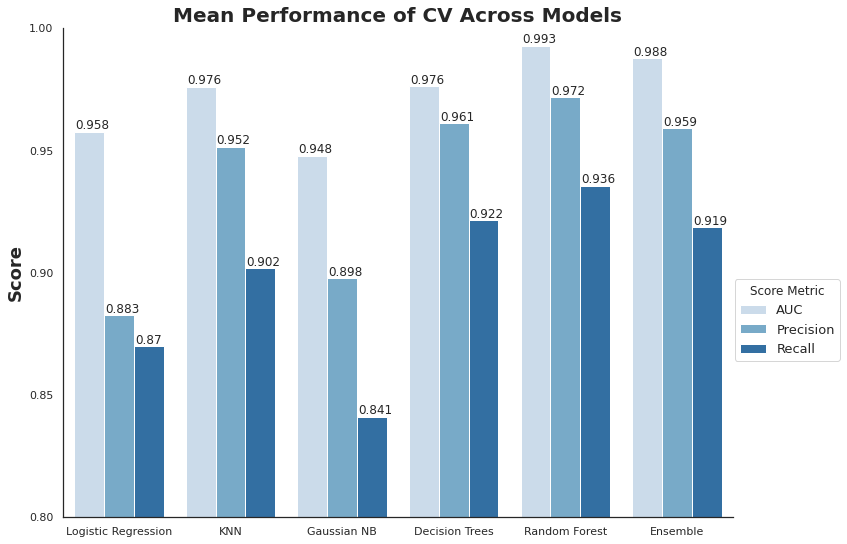

In [148]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Blues')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()
plt.savefig('modelbarplot.png',transparent=True, bbox_inches='tight')

In [149]:
rf = RandomForestClassifier(max_depth=17,random_state=42)
rf.fit(X_train_val,y_train_val)
print("Random Forest score: {:.4f}".format(rf.score(X_train_val,y_train_val)))

Random Forest score: 0.9880


In [150]:
y_predict = rf.predict_proba(X_test)[:, 1]>=0.7
precision_score(y_test, y_predict)

0.9943310657596371

In [151]:
recall_score(y_test, y_predict)

0.9000410509031199

In [152]:
f1_score(y_test, y_predict)

0.944839474251239

In [153]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])


0.9926576350709697

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

In [155]:
rf.feature_importances_

array([0.16224486, 0.02985247, 0.01448162, 0.20020503, 0.05226336,
       0.0757808 , 0.03838726, 0.0419814 , 0.02773352, 0.02574927,
       0.02691491, 0.02993778, 0.00593626, 0.04868995, 0.11906162,
       0.1007799 ])

In [156]:
df_impt = pd.DataFrame({'features':X_train_val.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=True)
df_impt

,features,importance
12,Gender_Male,0.005936
2,Food and drink,0.014482
9,Checkin service,0.025749
10,Inflight service,0.026915
8,Baggage handling,0.027734
1,Ease of Online booking,0.029852
11,Cleanliness,0.029938
6,On-board service,0.038387
7,Leg room service,0.041981
13,Customer Type_disloyal Customer,0.048690


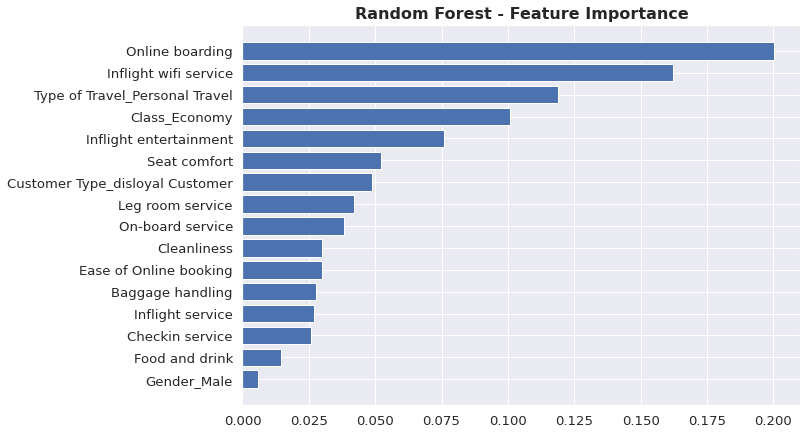

In [157]:
sns.set(style='darkgrid',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(df_impt['features'],df_impt['importance'])
plt.title('Random Forest - Feature Importance',weight='bold',fontsize=16)
plt.savefig('featureplot.png',transparent=True, bbox_inches='tight')

In [158]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(DF['id']))
Test_Set['Predicted Satisfaction'] = (rf.predict_proba(X_test)[:, 1]>=0.7).astype(int)
Test_Set = Test_Set[['satisfaction','Predicted Satisfaction','Inflight wifi service','Ease of Online booking','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Class_Economy']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set['satisfaction'] = Test_Set['satisfaction'].map({0:'Neutral/Dissatisfied',1:'satisfied'})
Test_Set['Predicted Satisfaction'] = Test_Set['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'satisfied'})
Test_Set

,satisfaction,Predicted Satisfaction,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,Neutral/Dissatisfied,4,4,5,4,5,5,1,4,3,3,3,5,1,0,1
1,Neutral/Dissatisfied,Neutral/Dissatisfied,1,1,3,1,3,3,2,5,2,3,3,3,1,0,1
2,Neutral/Dissatisfied,Neutral/Dissatisfied,2,1,1,4,4,2,2,4,3,4,1,4,0,1,1
3,satisfied,satisfied,5,5,5,5,5,5,5,5,4,3,4,5,0,0,0
4,satisfied,satisfied,5,5,2,5,4,4,4,4,4,3,4,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11071,Neutral/Dissatisfied,Neutral/Dissatisfied,1,1,2,1,2,2,4,5,4,5,5,2,1,0,1
11072,Neutral/Dissatisfied,Neutral/Dissatisfied,3,3,1,3,1,1,5,3,4,2,3,1,0,1,1
11073,Neutral/Dissatisfied,Neutral/Dissatisfied,3,5,5,3,4,3,3,3,3,3,3,2,0,0,1
11074,Neutral/Dissatisfied,Neutral/Dissatisfied,2,2,5,2,5,5,4,1,3,3,4,5,0,1,1


In [159]:
Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['satisfaction']=='satisfied')&(Test_Set['Type of Travel_Personal Travel']==0)&((Test_Set['Inflight wifi service']!=5))].head(100)


,satisfaction,Predicted Satisfaction,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
11,satisfied,satisfied,1,1,2,3,5,5,5,5,5,3,5,5,0,0,0
14,satisfied,Neutral/Dissatisfied,3,3,3,2,4,2,2,2,2,4,2,3,0,0,0
27,satisfied,satisfied,1,2,5,4,4,5,5,5,5,3,5,4,0,0,0
28,satisfied,satisfied,3,3,4,5,4,4,3,5,5,4,4,4,0,0,0
31,satisfied,satisfied,1,1,3,4,5,3,3,2,3,4,3,5,0,0,0
34,satisfied,satisfied,1,1,3,5,5,5,5,5,5,3,5,3,0,0,0
48,satisfied,satisfied,1,1,5,5,5,5,5,5,5,4,5,3,0,0,0
49,satisfied,satisfied,1,1,5,4,5,5,5,5,5,5,5,3,0,0,0
50,satisfied,satisfied,3,3,5,4,5,5,5,5,5,5,5,5,0,0,0
57,satisfied,satisfied,3,3,5,5,5,5,5,2,3,2,2,5,0,0,0


##### new business trial 

In [163]:
newbusiness = []
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':0})     
newbusiness.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':1})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':1})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':0, 'Gender_Male':0})
newbusiness = pd.DataFrame(newbusiness)

In [164]:
newbusiness['Predicted Satisfaction'] = (rf.predict_proba(newbusiness)[:, 1]>=0.5).astype(int)
newbusiness = newbusiness[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
newbusiness['Predicted Satisfaction'] = newbusiness['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
newbusiness

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,0,0
2,Satisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,0,0
3,Satisfied,3,4,4,4,4,4,4,4,4,4,4,4,0,0,0
4,Neutral/Dissatisfied,3,5,4,4,4,4,4,4,4,4,4,4,0,0,0
5,Satisfied,3,4,5,5,5,5,5,5,5,5,5,5,0,0,0


In [165]:
newbusiness = []
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':0})     
newbusiness.append({'Inflight Wifi Service':5,'Ease Of Online Booking':3,'Food And Drink':3,'Online Boarding':3,'Seat Comfort':3,'Inflight Entertainment':3,'On-board Service':3,'Leg Room':3,'Baggage Handling':3,'Checkin Service':3,'Inflight Service':3,'Cleanliness':3,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':1})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':0})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':5,'Food And Drink':4,'Online Boarding':4,'Seat Comfort':4,'Inflight Entertainment':4,'On-board Service':4,'Leg Room':4,'Baggage Handling':4,'Checkin Service':4,'Inflight Service':4,'Cleanliness':4,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':1})
newbusiness.append({'Inflight Wifi Service':3,'Ease Of Online Booking':4,'Food And Drink':5,'Online Boarding':5,'Seat Comfort':5,'Inflight Entertainment':5,'On-board Service':5,'Leg Room':5,'Baggage Handling':5,'Checkin Service':5,'Inflight Service':5,'Cleanliness':5,'Customer Type_Returning Customer':0,'Type Of Travel_Personal Travel':0,'Class_Economy':1, 'Gender_Male':0})
newbusiness = pd.DataFrame(newbusiness)

In [166]:
newbusiness['Predicted Satisfaction'] = (rf.predict_proba(newbusiness)[:, 1]>=0.5).astype(int)
newbusiness = newbusiness[['Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
newbusiness['Predicted Satisfaction'] = newbusiness['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
newbusiness

,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,3,3,3,3,3,3,3,3,3,3,3,3,0,0,1
1,Satisfied,5,3,3,3,3,3,3,3,3,3,3,3,0,0,1
2,Neutral/Dissatisfied,3,5,5,5,5,5,5,5,5,5,5,5,0,0,1
3,Neutral/Dissatisfied,3,4,4,4,4,4,4,4,4,4,4,4,0,0,1
4,Neutral/Dissatisfied,3,5,4,4,4,4,4,4,4,4,4,4,0,0,1
5,Neutral/Dissatisfied,3,4,5,5,5,5,5,5,5,5,5,5,0,0,1
